# Logistic Regression Model

## Load the dataset

In [1]:
# Import the pandas, numpy packages and dump from joblib
import pandas as pd
import numpy as np
from joblib import dump

In [2]:
# Load the saved sets from data/processed using numpy
X_train = np.load('../data/processed/X_train.npy')
X_val   = np.load('../data/processed/X_val.npy'  )
y_train = np.load('../data/processed/y_train.npy')
y_val   = np.load('../data/processed/y_val.npy'  )

## Train Logistic Regression Model

In [3]:
# Import the LogisticRegression from sklearn.ensemble
from sklearn.linear_model import LogisticRegression

In [4]:
# Instantiate the LogisticRegression class called logreg
logreg = LogisticRegression()


In [5]:
# Fit the Logistic model
logreg.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Display the default parameter
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [7]:
from joblib import dump 

dump(logreg,  '../models/logreg_default.joblib')

['../models/logreg_default.joblib']

In [8]:
# Calculate the probability when target=1
probs_train=logreg.predict_proba(X_train)[:,1]
probs_val=logreg.predict_proba(X_val)[:,1]

In [9]:
# Import the function print_class_perf from models.performance and display the ROC-AUC score
import sys
sys.path.insert(1, '..')
from src.models.performance import print_class_perf

print_class_perf(y_actuals=y_train, y_probs=probs_train,set_name='Training')
print_class_perf(y_actuals=y_val, y_probs=probs_val,set_name='Validation')

ROC AUC Score Training: 0.7002227541362216
ROC AUC Score Validation: 0.7263480982185845


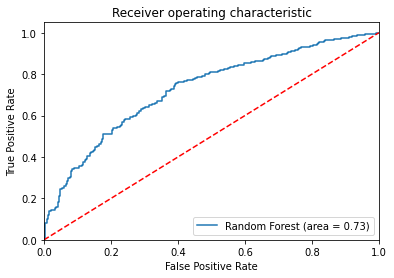

In [10]:
# Import roc_curve, matplotlib.pyplot and roc_auc_score and display the roc-auc plot
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

rf_roc_auc = roc_auc_score(y_val,probs_val)
fpr, tpr, thresholds = roc_curve(y_val, probs_val)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Load and clean the test dataset

In [11]:
# Load the pandas and numpy packages
import pandas as pd
import numpy as np

In [12]:
# Import csv file of test data and save into data_test
data_test=pd.read_csv('../data/raw/2022_test.csv')

In [13]:
# Create a copy of data_test and save it into a variable data_test_cleaned
data_test_cleaned=data_test.copy()

In [14]:
# Remove the columns of id, 3P Made, 3PA, 3P% and BLK
data_test_cleaned.drop(['Id','3P Made','3PA','3P%','BLK'],axis=1,inplace=True)

In [15]:
# Add the columns 'TOTAL_MIN','TOTAL_PTS' and 'FG/FT'
data_test_cleaned['TOTAL_MIN']=data_test_cleaned['MIN'] * data_test_cleaned['GP']
data_test_cleaned['TOTAL_PTS']=data_test_cleaned['PTS'] * data_test_cleaned['GP']
data_test_cleaned['FG/FT']=data_test_cleaned['FG%']/data_test_cleaned['FT%']


In [16]:
#  Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [17]:
# Instantiate the StandardScaler
scaler=StandardScaler()

In [18]:
# Fit and apply the scaling on data_test_cleaned
data_test_cleaned=scaler.fit_transform(data_test_cleaned)

In [19]:
# Create the variable X_test
X_test=data_test_cleaned

## Predict probabilities of target for test data

In [20]:
# Calculate the probabilities for test datasets
probs_test=logreg.predict_proba(X_test)[:,1]

In [21]:
# Join the probs_test column into data_test
data_test['TARGET_5Yrs']=probs_test

In [147]:
# Export the csv file 'rf_submission_091122.csv' for Kaggle submission
output=data_test[['Id','TARGET_5Yrs']]
output.to_csv('../logistic_submission_181122.csv',index=False)